## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick.. You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 

### Time to get you hands dirty! Open a jupyter notebook and code it up! 

 - Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

--------

### My implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15

In [2]:
doors = np.array([3, 100])                    
matches = 10000    

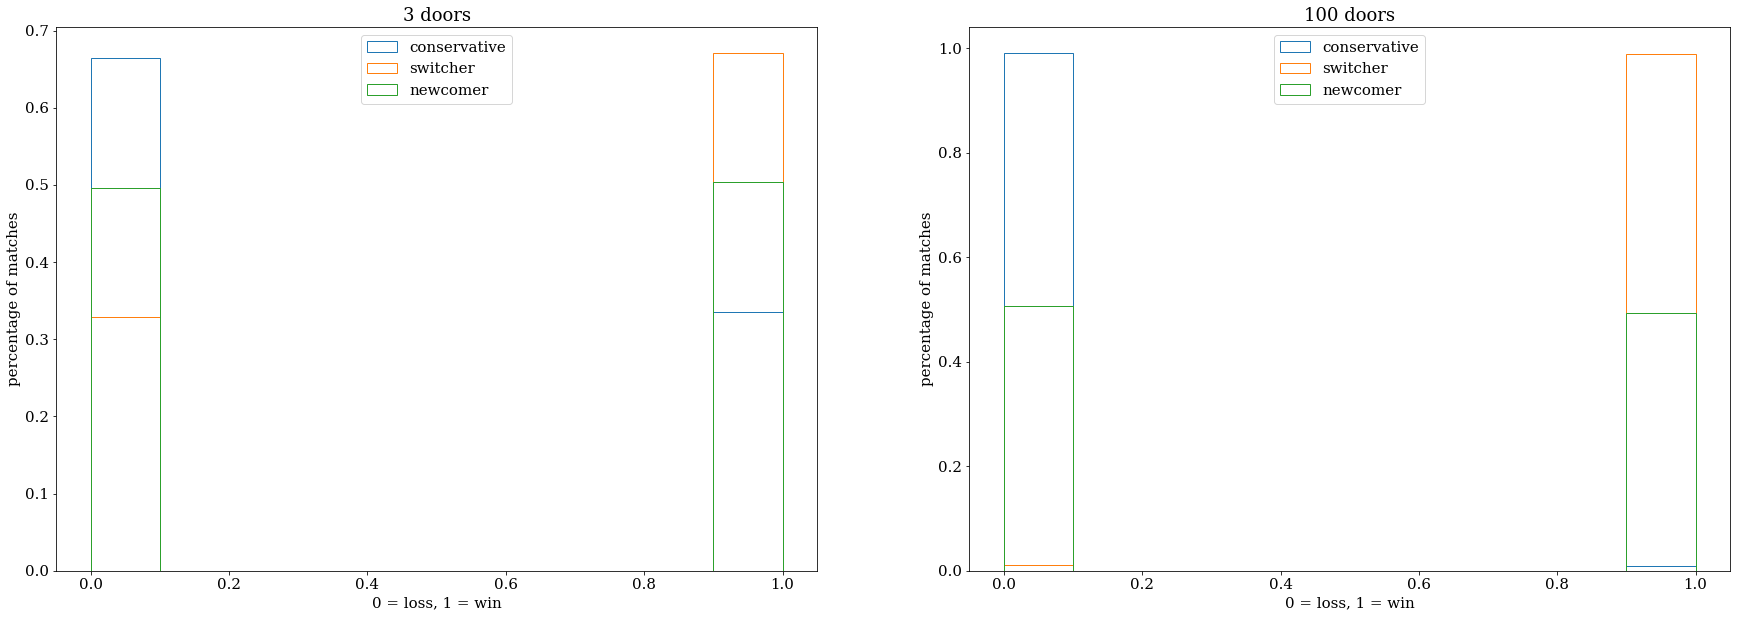

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
axs = [ax[0], ax[1]]

for i,N in enumerate(doors):
    
    outcome_c = []
    outcome_s = []
    outcome_n = []


    for x in range(0, matches):


        #doors with prizes
        prizes = np.zeros(N)                          #zeros=goat, one=car
        car = np.random.choice(range(0,N))
        prizes[car]=1    


        #THE CONSERVATIVE
        c = np.random.choice(range(0,N))               


        #THE SWITCHER
        s1 = np.random.choice(range(0,N))                                #first choice
        if (s1 == car):                                                  #door are opened -> remain only two doors, one with a goat and one with a car.
            s2 = np.random.choice((np.delete(np.arange(0,N), car)))       
        else:
            s2 = car


        #THE NEWCOMER
        n = np.random.choice([car, np.random.choice((np.delete(np.arange(0,N), car)))])       


        #outcomes
        outcome_c.append(prizes[c])            #0->lost, 1->win
        outcome_s.append(prizes[s2])
        outcome_n.append(prizes[n])

        
    a = axs[i]
    a.hist(outcome_c, weights=np.ones(matches)/matches, histtype='step', label='conservative')
    a.hist(outcome_s, weights=np.ones(matches)/matches, histtype='step', label='switcher')
    a.hist(outcome_n, weights=np.ones(matches)/matches, histtype='step', label='newcomer')
    a.set_title(str(N)+' doors')
    a.set_xlabel('0 = loss, 1 = win')
    a.set_ylabel('percentage of matches')
    a.legend(loc='upper center');